# 1B2. Práctica: Cálculo de frecuencias a nivel de palabras

### Alumno: **Luis Fernando Izquierdo Berdugo**
### Materia: **Procesamiento de Información**
### Fecha: **20 de Agosto de 2024**

**Instrucciones**:

Crear un notebook para preprocesar el texto y convertirlo a minúsculas, quitar acentos y los siguientes caracteres:

`;:,.\\-\"'/()[]¿?¡!{}~<>|«»-—’\t\n\r`

1. Calcular las frecuencias a nivel de palabras de los siguientes documentos.
- Libro 1
- Libro 2
Generar los histogramas para cada archivo.

2. En el notebook, responder las siguientes preguntas:

- ¿Cuántas palabras hay en cada texto?
- ¿Cuántas palabras diferentes (palabras únicas) hay en el texto?
- ¿Cuántas son las palabras con frecuencia 1 (hapax legomena) en el texto? 
- Generar los histogramas de todos los documentos.  Para generar los histogramas, ordenar las palabras de acuerdo a la frecuencia de mayor a menor. Si el número de datos es excesivo y difícil de visualizar, presente los datos que considere convenientes, para que se aprecien, de forma adecuada, los datos graficados.

In [28]:
from nltk.corpus import stopwords
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')
_STOPWORDS = stopwords.words('spanish')
print(_STOPWORDS)


['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/izluis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
import re
import unicodedata

def remove_accents(text):
    return ''.join(c for c in unicodedata.normalize('NFD', text) if unicodedata.category(c) != 'Mn')

def remove_stopwords(text):
    text_nostop = []
    for word in text.split():
        if word in _STOPWORDS:
            continue
        else:
            text_nostop.append(word)
    return ' '.join(text_nostop)
            

file = open("libro_1.txt", "r")
libro_1 = file.read()
file.close()
libro_1 = libro_1.lower()
libro_1_nostop = remove_stopwords(libro_1)
libro_1_nostop = remove_accents(libro_1_nostop)
libro_1_nostop = re.sub(r"[\t\n]", " ", libro_1_nostop)
libro_1_nostop = re.sub(r"[;:,.\-\"'/\(\)\[\]¿?¡!\{\}~<>|«»-—’\r]", "", libro_1_nostop)
libro_1 = remove_accents(libro_1)
libro_1 = re.sub(r"[\t\n]", " ", libro_1)
libro_1 = re.sub(r"[;:,.\-\"'/\(\)\[\]¿?¡!\{\}~<>|«»-—’\r]", "", libro_1)


file = open("libro_2.txt", "r")
libro_2 = file.read()
file.close()
libro_2 = libro_2.lower()
libro_2_nostop = remove_stopwords(libro_2)
libro_2_nostop = remove_accents(libro_2_nostop)
libro_2_nostop = libro_2_nostop.lower()
libro_2_nostop = re.sub(r"[\t\n]", " ", libro_2_nostop)
libro_2_nostop = re.sub(r"[;:,.\-\"'/\(\)\[\]¿?¡!\{\}~<>|«»-—’\t\n\r]", "", libro_2_nostop)
libro_2 = remove_accents(libro_2)
libro_2 = re.sub(r"[\t\n]", " ", libro_2)
libro_2 = re.sub(r"[;:,.\-\"'/\(\)\[\]¿?¡!\{\}~<>|«»-—’\r]", "", libro_2)

file = open("text_1.txt", "r")
text_1 = file.read()
file.close()
text_1 = text_1.lower()
text_1nostop = remove_stopwords(text_1)
text_1nostop = remove_accents(text_1nostop)
text_1nostop = text_1nostop.lower()
text_1nostop = re.sub(r"[\t\n]", " ", text_1nostop)
text_1nostop = re.sub(r"[;:,.\-\"'/\(\)\[\]¿?¡!\{\}~<>|«»-—’\t\n\r]", "", text_1nostop)
text_1 = re.sub(r"[\t\n]", " ", text_1)
text_1 = re.sub(r"[;:,.\-\"'/\(\)\[\]¿?¡!\{\}~<>|«»-—’\t\n\r]", "", text_1)

file = open("text_2.txt", "r")
text_2 = file.read()
file.close()
text_2 = text_2.lower()
text_2nostop = remove_stopwords(text_2)
text_2nostop = remove_accents(text_2nostop)
text_2nostop = text_2nostop.lower()
text_2nostop = re.sub(r"[\t\n]", " ", text_2nostop)
text_2nostop = re.sub(r"[;:,.\-\"'/\(\)\[\]¿?¡!\{\}~<>|«»-—’\t\n\r]", "", text_2nostop)
text_2 = re.sub(r"[\t\n]", " ", text_2)
text_2 = re.sub(r"[;:,.\-\"'/\(\)\[\]¿?¡!\{\}~<>|«»-—’\t\n\r]", "", text_2)

file = open("text_3.txt", "r")
text_3 = file.read()
file.close()
text_3 = text_3.lower()
text_3nostop = remove_stopwords(text_3)
text_3nostop = remove_accents(text_3nostop)
text_3nostop = text_3nostop.lower()
text_3nostop = re.sub(r"[\t\n]", " ", text_3nostop)
text_3nostop = re.sub(r"[;:,.\-\"'/\(\)\[\]¿?¡!\{\}~<>|«»-—’\t\n\r]", "", text_3nostop)
text_3 = re.sub(r"[\t\n]", " ", text_3)
text_3 = re.sub(r"[;:,.\-\"'/\(\)\[\]¿?¡!\{\}~<>|«»-—’\t\n\r]", "", text_3)

file = open("text_4.txt", "r")
text_4 = file.read()
file.close()
text_4 = text_4.lower()
text_4nostop = remove_stopwords(text_4)
text_4nostop = remove_accents(text_4nostop)
text_4nostop = text_4nostop.lower()
text_4nostop = re.sub(r"[\t\n]", " ", text_4nostop)
text_4nostop = re.sub(r"[;:,.\-\"'/\(\)\[\]¿?¡!\{\}~<>|«»-—’\t\n\r]", "", text_4nostop)
text_4 = re.sub(r"[\t\n]", " ", text_4)
text_4 = re.sub(r"[;:,.\-\"'/\(\)\[\]¿?¡!\{\}~<>|«»-—’\t\n\r]", "", text_4)

file = open("text_5.txt", "r")
text_5 = file.read()
file.close()
text_5 = text_5.lower()
text_5nostop = remove_stopwords(text_5)
text_5nostop = remove_accents(text_5nostop)
text_5nostop = text_5nostop.lower()
text_5nostop = re.sub(r"[\t\n]", " ", text_5nostop)
text_5nostop = re.sub(r"[;:,.\-\"'/\(\)\[\]¿?¡!\{\}~<>|«»-—’\t\n\r]", "", text_5nostop)
text_5 = re.sub(r"[\t\n]", " ", text_5)
text_5 = re.sub(r"[;:,.\-\"'/\(\)\[\]¿?¡!\{\}~<>|«»-—’\t\n\r]", "", text_5)

In [30]:

def frecuencia(text, top_n):
  palabras = re.findall(r'\w+', text)
  frecuencia = {}
  for palabra in palabras:
    frecuencia[palabra] = frecuencia.get(palabra, 0) + 1

  frecuencia = sorted(frecuencia.items(), key=lambda item: item[1], reverse=True)
  return frecuencia[:top_n]

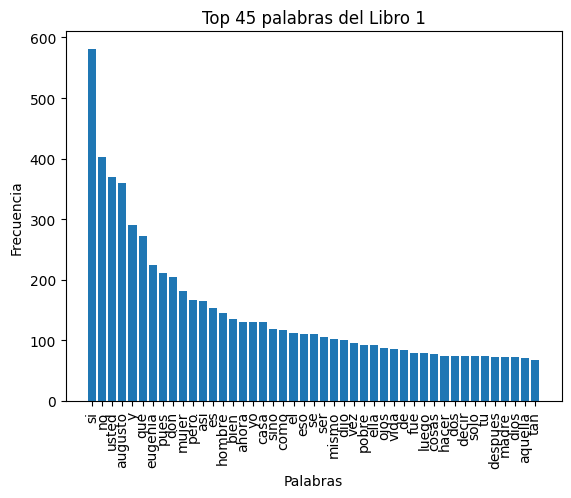

In [35]:
import matplotlib.pyplot as plt

def histograma(word_frec, nombre, n):
  palabras, frecuencia = zip(*word_frec)
  plt.bar(palabras, frecuencia)
  plt.xlabel("Palabras")
  plt.ylabel("Frecuencia")
  plt.title(f"Top {n} palabras del {nombre}")
  plt.xticks(rotation=90)
  plt.show()

frecuencia_libro1 = frecuencia(libro_1_nostop, 45)
histograma(frecuencia_libro1, "Libro 1", 45)

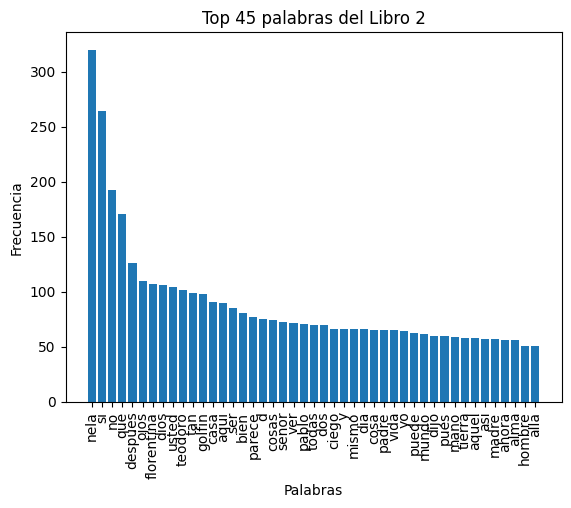

In [36]:
frecuencia_libro2 = frecuencia(libro_2_nostop, 45)
histograma(frecuencia_libro2, "Libro 2", 45)